<a href="https://colab.research.google.com/github/adithya1010/Naan-Mudhalvan-Labs/blob/main/Task-3/NaanMudhlavan_Task3_HousingPrice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-3-Housing Price Prediction-2**

Project done with inputs from GPT 4o Mini

**Link to Chats:**

1. https://www.getmerlin.in/share/chat/6AOAjnDj3Bl

2. https://www.getmerlin.in/share/chat/Lrek6WuEsVZ

**Dataset:** https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

**References:**

1. https://www.kaggle.com/code/cchen002/housing-price-linear-regression-practice/notebook

### Importing libararies


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import Python libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading the dataset

In [ ]:
# load the dataset
data = pd.read_csv("/Housing.csv")

### Exploratory data analysis




In [ ]:
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.shape


(545, 13)

### Correlation Heatmap of non-categorical variables

**Selecting Non-Categorical Columns:**

non_categorical_data = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
Here, you extract specific columns from your DataFrame data that are assumed to be non-categorical (i.e., numerical values).

**Calculating the Correlation Matrix:**


corr_matrix = non_categorical_data.corr()
The .corr() method computes the pairwise correlations between the numerical columns in the dataset.

**Plotting the Heatmap:**



plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Non-Categorical Variables')
plt.show()
A new figure is created with a predefined size.
Seaborn's heatmap function is used to plot the correlation matrix. The annot=True argument shows the correlation coefficients in the cells, and cmap='coolwarm' defines the color scheme.
Finally, the title of the plot is set, and the figure is displayed.

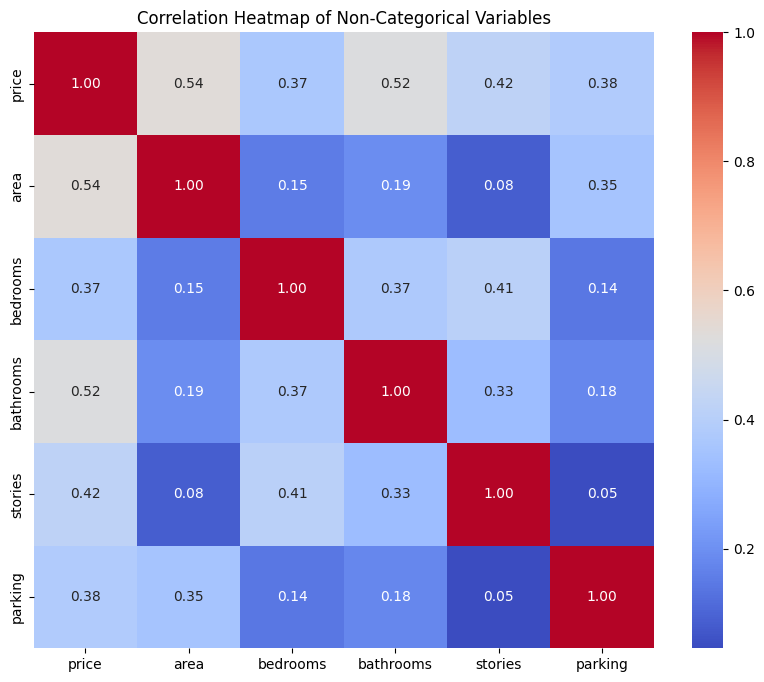

In [ ]:
# Select only non-categorical columns
non_categorical_data = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

# Calculate correlation matrix
corr_matrix = non_categorical_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Non-Categorical Variables')
plt.show()

**What we infer from the HeatMap:**
1. Price and Area are correlated
2. Price and Bathrooms are correlated

### Simple Linear Regression

In [21]:
# define X and y
X= data.loc[:,'area']
y= data.loc[:,'price']
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


Here's what's happening:

np.array(X) converts the variable X into a NumPy array.
.reshape(-1,1) reshapes the array to have a specified number of rows and columns. The -1 means the function will automatically determine the number of rows based on the total number of elements in the array, and 1 means there will be 1 column.
print(X.shape) displays the shape of the resh

In [23]:
X = np.array(X).reshape(-1,1)
print(X.shape)


(545, 1)


### Setting up Linear Regression Model

In [24]:
#set up a liner regression model
LR1 = LinearRegression()

#train the model
LR1.fit(X,y)

LinearRegression()

### Printing the first 5 predicted values

In [25]:
# Calculate predicted values
y_predict_1 = LR1.predict(X)

# Print the first 5 predicted values
print(y_predict_1[:5])

[5815162.19790048 6526603.53508057 6988578.42935335 5852120.18944231
 5815162.19790048]


### Visualizing the model

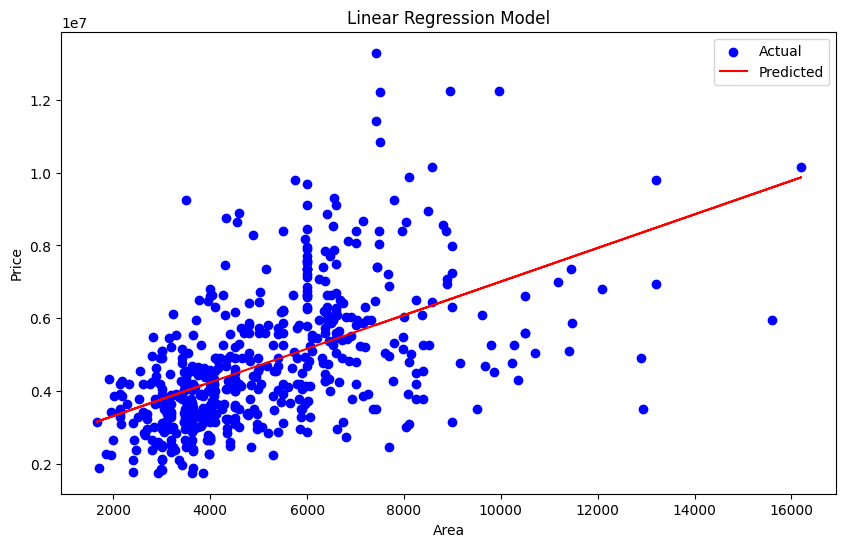

In [26]:
# Visualize the model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_predict_1, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

### Calculating the error

In [29]:
# Calculate mean squared error
mse = mean_squared_error(y, y_predict_1)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y, y_predict_1)

print("Mean Squared Error:", mse)
print(f"Root Mean Squared Error: {rmse}")
print("R-squared Score:", r2)

Mean Squared Error: 2488861398180.6567
Root Mean Squared Error: 1577612.5627607866
R-squared Score: 0.2872931546811469


**Conclusion:**

The linear regression model achieved a mean squared error of approximately 2.49 trillion and an R-squared score of approximately 0.29. The high MSE implies that there is a substantial deviation between the predicted and actual prices, indicating that the model's predictions are not consistently accurate. Additionally, the R-squared score of approximately 0.29 indicates that only 29% of the variability in the actual prices is accounted for by the model, The model's predictive performance is limited, indicating that other factors beyond the area may play significant roles in determining the property prices.

### Predicting price


**For Average Area:**

In [28]:
area1 = 5150.54 # avearage area

# Reshape the area value(s) to match the input shape expected by the model
area1 = np.array(area1).reshape(-1, 1)

# Use the trained model to predict the price for the given area value(s)
predicted_area1 = LR1.predict(area1)

print("Predicted Price:", predicted_area1)

Predicted Price: [4766728.65434417]


**For Maximum Area:**

In [ ]:
area2 = 16200 # maximun area

# Reshape the area value(s) to match the input shape expected by the model
area2 = np.array(area2).reshape(-1, 1)

# Use the trained model to predict the price for the given area value(s)
predicted_area2 = LR1.predict(area2)

print("Predicted Price:", predicted_area2)